<a href="https://colab.research.google.com/github/Annergeticaura/Quality-of-Life-Prediction/blob/main/QOL_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**KMeans classifier on Quality of Life**

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**Loading dataset**

In [2]:
df=pd.read_csv('quality_of_life_dataset (2).csv')
df.drop(['quality_of_life'],axis=True)

,latitude,longitude,population,healthcare_index,crime_index,air_quality_index,weather_index,mall_avail,metro_avail,income_rate,literacy_rate,employment_rate
0,24.464405,84.085443,115959,54.390246,70.349863,87.756626,3.594751,1,1,22449.956609,64.645721,65.792573
1,29.455681,72.344089,299647,49.114132,52.147775,44.696280,7.799782,1,0,6655.475074,93.448676,59.916838
2,26.082901,91.352088,131921,74.960073,45.290288,57.342957,5.637430,0,0,26765.097979,90.716009,61.332226
3,24.346495,82.883290,931625,59.805387,28.458841,59.792095,5.207274,1,0,12466.372797,85.876913,55.583040
4,20.709644,89.793467,181926,42.662540,44.482527,26.820160,1.888027,0,0,24706.159130,97.445817,47.409122
...,...,...,...,...,...,...,...,...,...,...,...,...
5044,11.393002,82.318407,410130,40.380010,35.875771,60.086678,5.799895,1,1,6870.704092,91.780669,39.366326
5045,35.330759,97.472528,497310,81.620025,16.530314,13.749975,7.931605,0,1,24063.036386,99.435142,65.474699
5046,25.942620,73.497854,323974,67.980620,71.428805,45.554522,9.616273,0,1,2779.834134,89.778807,56.111417
5047,15.504762,84.362974,170012,60.268542,31.312898,41.316097,7.877973,0,0,2938.817352,92.132064,87.107730


In [3]:
df.head(5)


,latitude,longitude,population,healthcare_index,crime_index,air_quality_index,weather_index,mall_avail,metro_avail,income_rate,literacy_rate,employment_rate,quality_of_life
0,24.464405,84.085443,115959,54.390246,70.349863,87.756626,3.594751,1,1,22449.956609,64.645721,65.792573,1
1,29.455681,72.344089,299647,49.114132,52.147775,44.696280,7.799782,1,0,6655.475074,93.448676,59.916838,1
2,26.082901,91.352088,131921,74.960073,45.290288,57.342957,5.637430,0,0,26765.097979,90.716009,61.332226,1
3,24.346495,82.883290,931625,59.805387,28.458841,59.792095,5.207274,1,0,12466.372797,85.876913,55.583040,3
4,20.709644,89.793467,181926,42.662540,44.482527,26.820160,1.888027,0,0,24706.159130,97.445817,47.409122,1


**Feature Scaling (Absolute Maximum Scaling)**

In [4]:
feature=['population','healthcare_index','crime_index','air_quality_index','weather_index','mall_avail','metro_avail','income_rate','literacy_rate','employment_rate']
X=df[feature]



In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5049 entries, 0 to 5048
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   latitude           5049 non-null   float64
 1   longitude          5049 non-null   float64
 2   population         5049 non-null   int64  
 3   healthcare_index   5049 non-null   float64
 4   crime_index        5049 non-null   float64
 5   air_quality_index  5049 non-null   float64
 6   weather_index      5049 non-null   float64
 7   mall_avail         5049 non-null   int64  
 8   metro_avail        5049 non-null   int64  
 9   income_rate        5049 non-null   float64
 10  literacy_rate      5049 non-null   float64
 11  employment_rate    5049 non-null   float64
 12  quality_of_life    5049 non-null   int64  
dtypes: float64(9), int64(4)
memory usage: 512.9 KB


In [20]:
for column in X.columns:
        max_value = X[column].max()
        X[column] /= max_value
X


<ipython-input-20-f5dfd2b2d46c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[column] /= max_value


,population,healthcare_index,crime_index,air_quality_index,weather_index,mall_avail,metro_avail,income_rate,literacy_rate,employment_rate
0,0.115962,0.604361,0.879398,0.975347,0.359532,1.0,1.0,0.748375,0.646580,0.658048
1,0.299655,0.545735,0.651865,0.496764,0.780102,1.0,0.0,0.221862,0.934664,0.599280
2,0.131925,0.832924,0.566144,0.637322,0.563833,0.0,0.0,0.892221,0.907332,0.613436
3,0.931651,0.664532,0.355745,0.664543,0.520810,1.0,0.0,0.415570,0.858932,0.555934
4,0.181931,0.474048,0.556047,0.298085,0.188833,0.0,0.0,0.823586,0.974643,0.474179
...,...,...,...,...,...,...,...,...,...,...
5044,0.410141,0.448685,0.448460,0.667817,0.580082,1.0,1.0,0.229037,0.917981,0.393736
5045,0.497324,0.906926,0.206635,0.152820,0.793287,0.0,1.0,0.802148,0.994540,0.654868
5046,0.323983,0.755371,0.892885,0.506303,0.961780,0.0,1.0,0.092666,0.897959,0.561218
5047,0.170017,0.669678,0.391422,0.459196,0.787923,0.0,0.0,0.097966,0.921496,0.871239


**Splitting the data**

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train,X_test=train_test_split(X,test_size=0.05,random_state=0)

**Data preprocessing using Standard Scaler**

In [23]:
from sklearn.preprocessing import StandardScaler
import numpy as np

In [24]:
st=StandardScaler()

In [25]:
X_train=st.fit_transform(X_train)
X_test=st.transform(X_test)

In [26]:
X_train=np.nan_to_num(X_train, nan=0.0)
X_test=np.nan_to_num(X_test, nan=0.0)

In [27]:
X_test

array([[ 1.3015738 , -1.20562868, -0.79069384, ..., -0.06493861,
        -0.60870376,  0.53704817],
       [-1.62935717, -1.64656213,  1.16154012, ..., -0.22463393,
        -1.25333694, -0.76693736],
       [ 0.01334167,  0.07871336,  1.58988023, ...,  1.40433663,
        -1.12011397, -0.02066959],
       ...,
       [ 0.12704934,  0.18932131, -0.21473537, ..., -1.66965989,
         1.12217507,  0.31123058],
       [ 0.11813967,  0.33667657, -1.15693733, ...,  0.45409664,
        -1.03379281,  1.26609033],
       [-1.65158968,  0.79902584, -1.00518235, ...,  0.02213596,
        -0.49035107,  0.0154868 ]])

**Using KNN from 1 to 20 to classify**

In [28]:
from sklearn.cluster import KMeans
from sklearn.tree import plot_tree


In [29]:
inertia=[]
clusters=range(1,11)
for i in clusters:
  clf=KMeans(n_clusters=i,random_state=43)
  clf.fit(X_train)
  inertia.append(clf.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

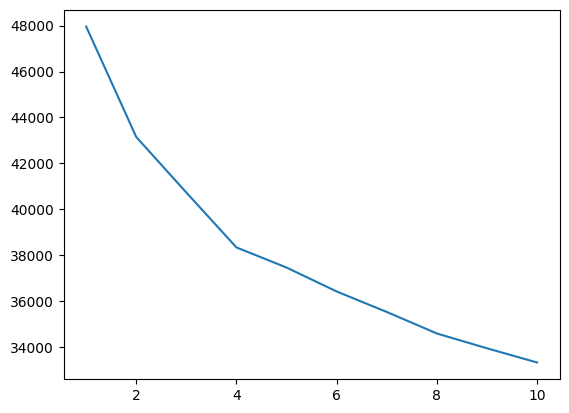

In [30]:
import matplotlib.pyplot as plt
plt.plot(clusters,inertia)

In [31]:
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)


**Plot the mfing data**

In [38]:
kmeans.fit(X_train)

KMeans(n_clusters=4, n_init=10, random_state=0)

In [39]:
y_pred =kmeans.predict(X_test)

In [41]:
from sklearn.metrics import silhouette_score

In [42]:
silhouette_avg = silhouette_score(X_test, y_pred)
silhouette_avg

0.10330606108034131

In [43]:
import pickle

In [44]:
with open('kmeans_model.pkl', 'wb') as f:
    pickle.dump(kmeans, f)

In [45]:
with open('kmeans_model.pkl', 'rb') as f:
    kmeans = pickle.load(f)